# Moto lungo un piano inclinato

## Esperimento sul moto 1D e analisi dati

Il moto di un corpo lungo un piano inclinato può essere studiato come esempio di **moto in una dimensione**. Obiettivo di questo esempio è quello di studiare la posizione, la velocità e l'accelerazione in funzione del tempo.

<div id = "immagine">

<img src = "Immagini/Inclinato_01.jpg" alt = "Immagine">

</div>

### Descrizione

L'oggetto che si muove lungo il piano inclinato può essere descritto come un punto materiale che si muove lungo una retta. La posizione del punto materiale può essere individuata tramite la coordinata $ x $, il cui valore corrisponde in questo caso alla distanza tra l'oggetto ed un sensore situato all'inizio della pista.

<div id = "immagine">

<img src = "Immagini/Inclinato_02.jpg" alt = "Immagine">

</div>

In particolare, utilizziamo un **sensore ultrasonico** di distanza **HC-SR04** che viene alimentato e controllato tramite una scheda [**Raspberry Pi**](https://www.raspberrypi.org/) (Raspberry Pi3 model B).

<div id = "immagine">

<img src = "Immagini/Inclinato_03.jpg" alt = "Immagine">

</div>

Semplici codici Python permettono di:

* Registrare i valori di distanza tra il sensore fisso ed il veicolo in movimento.

* E contemporaneamente misurare il tempo trascorso da un certo istante iniziale.

I collegamenti del sensore alla scheda Raspberry Pi ed i codici Python per effettuare le misure sono descritti nel riferimento [1. Physics Education 2020](https://iopscience.iop.org/article/10.1088/1361-6552/ab73d2) (v. anche Supplementary Information)

### Outline dell'attività

1. **Effettuare un esperimento** registrando i valori della distanza sensore-oggetto durante il moto lungo il piano inclinato. Lo script Python permette di memorizzare i dati in un file di testo **distance-table.csv** organizzato nel modo seguente:

| Tempo (s)             | Distanza (m)        |
| :-------------------- | :------------------ |
| 6.300999302766286e-06 | 0.04921078322613539 |
| 0.20044025799870724   | 0.04400026829147464 |

2. Ottenere una **rappresentazione grafica** dei dati.

3. **Elaborare i dati** per ottenere i valori di velocità in funzione del tempo.

4. Rappresentare graficamente l'andamento della velocità in funzione del tempo.

5. Calcolare i valori dell'accelerazione in funzione del tempo e mostrare l'andamento in un grafico.

6. Analizzare i dati di velocità:

    * Scegliendo un intervallo di tempo nel quale l'andamento della velocità in funzione del tempo è lineare
    
    * e trovando i parametri della retta che si adatta meglio ai dati sperimentali.
    
        * La pendenza della retta fornisce il valore dell'accelerazione in tale intervallo di tempo.

7. Valutare i risultati ottenuti riportando in un'unica figura i grafici di: coordinata $ x $, velocità e accelerazione.

8. Confrontare il valore stimato dell'accelerazione con il valore calcolato utilizzando un **modello fisico**.

Altri dettagli sui codici Python e sull'analisi dati sono forniti nel notebook Viaggio in ascensore.

### 1. Esperimento

Predisponiamo un piano inclinato ed un oggetto che possa essere lasciato muovere lungo il piano inclinato.

Cerchiamo di svolgere l'esperimento in modo che le **condizioni** siano **ripetibili**.

Una grandezza che caratterizza le condizioni in cui viene svolto l'esperimento è la misura dell'**angolo** che il piano inclinato forma con la direzione orizzontale.
Si può misurare agevolmente questo angolo installando sullo smartphone l'applicazione [phyphox](https://phyphox.org/). Tra i menù disponibili, sotto la voce **Strumenti** scegliere **Inclinazione** (misura l'angolo d'inclinazione del telefono). Premere il tasto **play** per iniziare la misura.

<div id = "immagine">

<img src = "Immagini/Phyphox.png" alt = "Immagine">

</div>

&nbsp;

Si manda in esecuzione sulla Raspberry Pi il codice **distance_recorder.py** e si lascia che l'oggetto si muova lungo il piano inclinato, mentre i valori di distanza vengono misurati e memorizzati in un array. Lo script Python produce il file **distance_table.csv** in cui sono riportati i dati di tempo e distanza.

### 2. Rappresentazione grafica dei dati

Con il seguente codice leggiamo i dati contenuti nel file **distance-table.csv** e riportiamo in grafico la distanza sensore - oggetto in funzione del tempo trascorso da un certo istante iniziale.

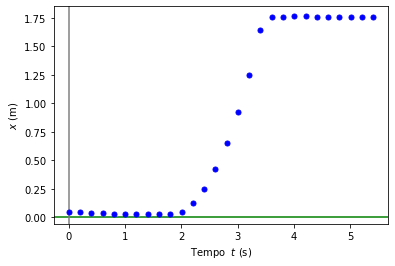

In [46]:
# Utilizzato per importare la libreria adoperata per funzioni matematiche.
import numpy as np
# Utilizzato per importare la libreria adoperata per rappresentare graficamente le grandezze.
import matplotlib.pyplot as plt


inputDataFile = "Dati/distance-table.csv"

# Utilizzato per leggere i dati da file.
t, x = np.loadtxt(inputDataFile, delimiter = ",", unpack = True)

# Utilizzato per rappresentare graficamente i dati.
plt.plot(t, x, "o", color = "blue", markersize = 5)
plt.axhline(color = "green", zorder = -1)
plt.axvline(color = "gray", zorder = -1)
plt.xlabel("Tempo  $ t $ (s)")
plt.ylabel("$ x $ (m)")

print()
plt.show()
print()

### 3. Calcolare la velocità

Per calcolare la velocità consideriamo gli spostamenti $ \Delta x $ e la durata degli intervalli di tempo $ \Delta t $ tra due misure successive. La velocità media riferita ad ogni intervallo di tempo viene calcolata come:

<div id = "colorbox">

$$ v = \dfrac{\Delta x}{\Delta t} $$

</div>

Tale valore di velocità media viene riferito ad un tempo $ t' $ ottenuto come valore medio del tempo nell'intervallo $ \Delta t $ considerato. I dati calcolati vengono memorizzati in un file **Incline-Speed.csv**.

In [47]:
speedDataFile = "Dati/Incline-Speed.csv"

np.set_printoptions(precision = 20)
delta_t = np.diff(t)
delta_x = np.diff(x)
v = delta_x / delta_t
t_prime = t[:-1] + (delta_t / 2)

np.savetxt(speedDataFile, np.column_stack((t_prime, v)))

### 4. Grafico della velocità in funzione del tempo

Abbiamo già importato in una delle celle di Notebook Jupyter di questo notebook la libreria **matplotlib**, quindi con le seguenti righe di codice possiamo utilizzare la funzione **plt.plot()** ed altre funzioni di matplolib per costruire un grafico della velocità in funzione del tempo.

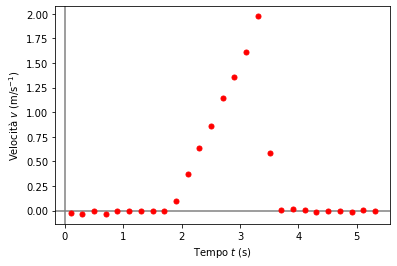

In [48]:
plt.plot(t_prime, v, "o", color = "red", markersize = 5)
plt.axhline(color = "gray", zorder = -1)
plt.axvline(color = "gray", zorder = -1)
plt.xlabel("Tempo $ t $ (s)")
plt.ylabel("Velocità $ v $ (m/s$ ^{-1} $)")
plt.draw()
print()
plt.show()

### 5. Calcolo dell'accelerazione

L'accelerazione dell'oggetto che si muove lungo il piano inclinato viene calcolata in questo esempio come accelerazione media riferita a ciascun intervallo di tempo $ \Delta t' $.

<div id = "colorbox">

$$ a = \dfrac{\Delta v}{\Delta t'} $$

</div>

Ciascun valore di accelerazione viene associato ad un tempo pari al valore medio del corrispondente intervallo $ \Delta t' $. I dati vengono memorizzati in un file **Incline-Acceleration.csv**.

In [49]:
accelerationDataFile = "Dati/Incline-Acceleration.csv"

np.set_printoptions(precision = 20)
delta_t_prime = np.diff(t_prime)
delta_v = np.diff(v)
a = delta_v / delta_t_prime
t_double_prime = t_prime[:-1] + (delta_t_prime / 2)

np.savetxt(accelerationDataFile, np.column_stack((t_double_prime, a)))

I valori così ottenuti vengono riportati in un grafico.

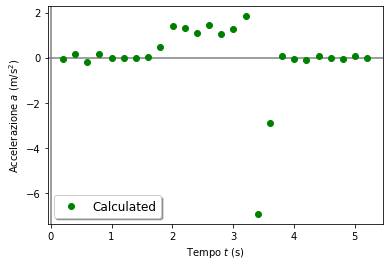

In [50]:
print()
plt.plot(t_double_prime, a, "o", color = "green", markersize = 6, label = "Calculated")
plt.axhline(color = "gray", zorder = -1)
plt.axvline(color = "gray", zorder = -1)
plt.xlabel("Tempo $ t $ (s)")
plt.ylabel("Accelerazione $ a $ (m/s$ ^{2} $)")
#plt.ylim(-1.5, 1.5)
plt.legend(loc = "lower left", shadow = True, fontsize = "large")
plt.draw()
plt.show()

> Possiamo osservare che l'accelerazione assume anche valori negativi. Questi valori corrispondono all'intervallo di tempo in cui l'oggetto, dopo essersi mosso lungo tutto il piano inclinato viene rallentato bruscamente, di proposito, contro un ostacolo morbido.

### 6. Analisi dei dati di velocità

#### 6.1. Selezione di un sottoinsieme dei dati

Il numero di coppie (tempo $ t' $, velocità $ v $) è dato dalla dimensione dell'array di numpy corrispondente.

In [51]:
np.size(t_prime)

27

Per poter restringere l'analisi ad un determinato intervallo di tempo utilizzamo due **marker** ciascuno dei quali corrisponde al numero progressivo del dato considerato.

Marker One =  0 Marker Two =  0 

Time One 0.100223279499005 s Time Two =  0.100223279499005 



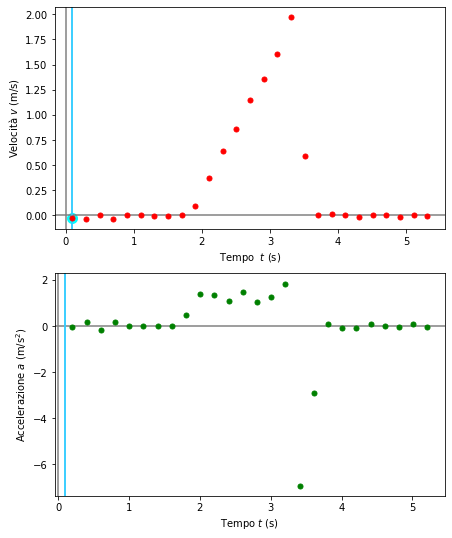

<function __main__.calculate(MarkerOne, MarkerTwo)>

In [52]:
# Utilizzato per importare la libreria adoperata per i widgets.
import ipywidgets as widgets


print()
print("Valori consigliati: 9, 17")

# Utilizzato per creare due sliders (widgets) adoperati per cambiare interattivamente il valore dei marker.
sliderMarkerOne = widgets.IntSlider(min = 0, max = (np.size(t_prime) - 1), step = 1, value = 0, continuous_update = False)
sliderMarkerTwo = widgets.IntSlider(min = 0, max = (np.size(t_prime) - 1), step = 1, value = 0, continuous_update = False)

def calculate(MarkerOne, MarkerTwo):
        print("Marker One = ", MarkerOne, "Marker Two = ", MarkerTwo, "\n")
        MarkerOneTime = t_prime[MarkerOne]
        MarkerTwoTime = t_prime[MarkerTwo]
        print("Time One", MarkerOneTime, "s", "Time Two = ", MarkerTwoTime, "\n")
        makeplots(MarkerOne, MarkerTwo)
        t_subset = t_prime[MarkerOne:MarkerTwo]
        v_subset = v[MarkerOne:MarkerTwo]

def makeplots(MarkerOne, MarkerTwo):
    fig = plt.figure(figsize = (7, 9))
    #plt.ion()
    plt.subplot(2, 1, 1)
    plt.plot(t_prime, v, "o", color = "red", markersize = 5)
    plt.plot(t_prime[MarkerOne], v[MarkerOne], "o", color = "magenta", markersize = 8, zorder = -1)
    plt.plot(t_prime[MarkerTwo], v[MarkerTwo], "o", color = "cyan", markersize = 10, zorder = -1)
    plt.axhline(color = "gray", zorder = -1)
    plt.axvline(color = "gray", zorder = -1)
    plt.axvline(color = "magenta", x = t_prime[MarkerOne], zorder = -1)
    plt.axvline(color = "cyan", x = t_prime[MarkerTwo], zorder = -1)
    plt.xlabel("Tempo  $ t $ (s)")
    plt.ylabel("Velocità $ v $ (m/s)")
    #plt.text(27, 1.8, inputDataFile)

    plt.subplot(2, 1, 2)
    plt.plot(t_double_prime, a, "o", color = "green", markersize = 5)
    plt.axhline(color = "gray", zorder = -1)
    plt.axvline(color = "gray", zorder = -1)
    plt.axvline(color = "magenta", x = t_prime[MarkerOne], zorder = -1)
    plt.axvline(color = "cyan", x = t_prime[MarkerTwo], zorder = -1)
    plt.xlabel("Tempo $ t $ (s)")
    plt.ylabel("Accelerazione $ a $ (m/s$ ^{2} $)")
    #plt.text(20, 0.2, speedDataFile)

# Utilizzato per collegare i widgets alla funzione e per interagire con gli sliders.
widgets.interact(calculate, MarkerOne = sliderMarkerOne, MarkerTwo = sliderMarkerTwo)

#### 6.2 Fit lineare dei dati di velocità

In una certa regione del grafico l'andamento della velocità in funzione del tempo è lineare. I valori della velocità soddisfano un'equazione del tipo:

<div id = "colorbox">

$$ v - v_0 = a \cdot (t - t_0) $$

</div>

Considerando che la velocità iniziale è nulla, si ha:

<div id = "colorbox">

$$ v = a \cdot (t - t_0) $$

</div>

Ovvero:

<div id = "colorbox">

$$ v = (a \cdot t) - (a \cdot t_0) $$

</div>

Il grafico di $ v $ in funzione di $ t $ può essere quindi descritto con l'equazione di una retta che, in un piano cartesiano $ Oxy $, è:

<div id = "colorbox">

$$ y = A x + B $$

</div>

Nel codice Python che segue definiamo una funzione che permette di calcolare i parametri $ A $ e $ B $ che forniscono il miglior accordo tra un insieme di dati e una retta. Applichiamo l'algoritmo all'insieme dei dati di velocità nell'intervallo di tempo che abbiamo selezionato ed otteniamo:

* Il valore del parametro A

    * Che fornisce una stima dell'**accelerazione** $ a $ nell'intervallo di tempo considerato.

* Il valore del parametro B

    * Dal quale possiamo ricavare il valore di $ t_0 $, essendo:

<div id = "colorbox">

$$ t_0 = - \dfrac{B}{A} $$

</div>

In [53]:
t_prime_subset = t_prime[sliderMarkerOne.value:sliderMarkerTwo.value]
v_subset = v[sliderMarkerOne.value:sliderMarkerTwo.value]

def LineFit(x, y):
    x_avg = x.mean()
    slope = (y * (x - x_avg)).sum() / (x * (x - x_avg)).sum()
    y_intercept = y.mean() - slope * x_avg
    return slope, y_intercept

a_est, v_intercept = LineFit(t_prime_subset, v_subset)

print("\n Estimated value of the acceleration (from the linear fit)")
print("\n a = {0:0.4} m/s^2 \n".format(a_est))
#print("v_intercept", v_intercept, "m/s", "\n")
t0 = - v_intercept / a_est
print("t0 = {0:0.4} s \n".format(t0))


 Estimated value of the acceleration (from the linear fit)

 a = nan m/s^2 

t0 = nan s 



C:\Users\Darka\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """
C:\Users\Darka\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Darka\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\Darka\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice.
  import sys


### 7. Figura riassuntiva: coordinata x, velocità, accelerazione

Vogliamo riassumere i risultati ottenuti in un'unica figura. I grafici sono organizzati in una tabella costituita da tre righe ed una colonna.

IndexError: index 0 is out of bounds for axis 0 with size 0

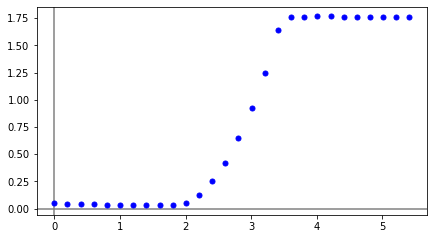

In [54]:
print()

v_fit = a_est * t_prime_subset + v_intercept

a_fit = v_fit / v_fit * a_est

x_fit = 0.5 * a_est * (t_prime_subset - t0) ** 2 + 0.029

fig = plt.figure(figsize = (7, 13))
#plt.ion()
plt.subplot(3, 1, 1)
plt.plot(t, x, "o", color = "blue", markersize = 5, label = "data")
plt.plot(t_prime_subset, x_fit, "-", color = "yellow", linewidth = 3, zorder = -1, label = "fit")
plt.axhline(color = "gray", zorder = -1)
plt.axvline(color = "gray", zorder = -1)
plt.axvline(color = "magenta", x = t_prime_subset[0], linewidth = 1, linestyle = "--", zorder = -1)
plt.axvline(color = "cyan", x = t_prime_subset[-1], linewidth = 1, linestyle = "--", zorder = -1)
plt.xlabel("Tempo $ t $ (s)")
plt.ylabel("Altezza $ h $ (m)")
#plt.text(27, 1.8, inputDataFile)
plt.legend(loc = "upper left", shadow = True, fontsize = "large")

plt.subplot(3, 1, 2)
plt.plot(t_prime, v, "o", color = "red", markersize = 5)
plt.plot(t_prime_subset, v_fit, "-", color = "orange", linewidth = 3)
plt.axhline(color = "gray", zorder = -1)
plt.axvline(color = "gray", zorder = -1)
plt.axvline(color = "magenta", x = t_prime_subset[0], linewidth = 1, linestyle = "--", zorder = -1)
plt.axvline(color = "cyan", x = t_prime_subset[-1], linewidth = 1, linestyle = "--", zorder = -1)
plt.xlabel("Tempo $ t $ (s)")
plt.ylabel("Velocità $ v $ (m/s)")
#plt.text(20, 0.2, speedDataFile)

plt.subplot(3, 1, 3)
plt.plot(t_double_prime, a, "o", color = "green", markersize = 6, label = "Calculated")
plt.plot(t_prime_subset, a_fit, color = "black", markersize = 3, label = "fit")
plt.axhline(color = "gray", zorder = -1)
plt.axvline(color = "gray", zorder = -1)
plt.xlabel("Tempo $ t $ (s)")
plt.ylabel("Accelerazione $ a $ (m/s$ ^{2} $)")
#plt.ylim(-1.5, 1.5)
plt.legend(loc = "lower left", shadow = True, fontsize = "large")
#plt.text(10, -1, accelerometerDataFile)

plt.savefig("Dati/Incline-Results.pdf")

plt.draw()
plt.show()
print()

* I valori di velocità sono riportati insieme al grafico della retta che meglio approssima i dati sperimentali nell'intervallo considerato. (**Grafico 2/3**)

* La pendenza di tale retta fornisce una stima dell'accelerazione. Questo valore costante di accelerazione è rappresentato come una linea orizzontale nel grafico che riporta i valori di accelerazione in funzione del tempo. (**Grafico 3/3**)

* I valori sperimentali di $ x $ in funzione del tempo sono mostrati in grafico (**Grafico 1/3**) insieme ai dati calcolati utilizzando l'equazione:

<div id = "colorbox">

$$ x = x_0 + \dfrac{1}{2} a \cdot (t - t_0)^2 $$

</div>

   * Con i valori di $ a $ e $ t_0 $ ottenuti dal fit lineare dei dati di velocità

   * E con il valore di $ x_0 $ che fornisce il miglior adattamento della curva (parabola) ai valori sperimentali di $ x $ vs. $ t $.

### 8. Confronto con le previsioni di un modello fisico

Se si considera come modello fisico il sistema costituito da un punto materiale che si muove **senza attrito** lungo il piano inclinato sotto l'azione della forza peso, conoscendo l'angolo $ \theta $ di inclinazione, si può prevedere che il moto sarà un **moto con accelerazione costante** pari a:

<div id = "colorbox">

$$ g \cdot \sin(\theta) $$

</div>

Dove $ g $ è l'accelerazione di gravità.

Nel nostro caso:

* Consideriamo la misura dell'angolo $ \theta $ ottenuta usando l'App **phyphox**.

* Convertiamo la misura in **radianti**.

* Calcoliamo il **valore atteso** dell'accelerazione in base alla previsione del modello.

In [ ]:
theta_deg = 11
theta_rad = theta_deg / 180 * np.pi
print("\n Inclinazione\n\n theta = {0:0.6} rad\n".format(theta_rad))

In [ ]:
np.sin(theta_rad)

In [ ]:
a_model = 9.8 * np.sin(theta_rad)

print()
print("Valore stimato dell'accelerazione in assenza di attrito \n")
print("a_model = {0:0.3f} m/s^2 \n".format(a_model))
print()
print("Valore dell'accelerazione stimato tramite fit dei dati sperimentali \n")
print("a_est = {0:0.3f} m/s^2 \n".format(a_est))
print()

relative_error = (a_model - a_est) / a_model

print("Errore relativo = {0:0.1f} %".format(relative_error * 100))

> Per eseguire il codice Python contenuto in questo **notebook** Jupyter, anche se Python e Notebook Jupyter non sono installati sulla macchina che stai adoperando, puoi utilizzare l'ambiente [**binder**](https://mybinder.org) online.

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Darkaquon/Physics-with-Open-Source-Software/master?filepath=%2FNotebook%2FPiano_inclinato.ipynb)

## Osservazione

Possiamo osservare che l'accelerazione ottenuta dai dati sperimentali è minore di quella stimata sulla base del modello.

> La presenza di una forza di attrito costante ha come conseguenza che la forza totale costante che agisce sul corpo in movimento è costante ed è minore rispetto al caso ideale. Si otterrebbe quindi un'accelerazione costante minore rispetto a quella attesa in assenza di attrito, in accordo con i risultati di questa indagine sperimentale.

## What we have learned

*Python*

* Acquisizione di dati con un apparato sperimentale controllato tramite software.

* Elaborazione dei dati, analisi dei dati.

* Rappresentazione grafica dei risultati.

*Fisica*

* Misure di distanza in funzione del tempo.

* Analisi dei dati.

* Andamento grafico della velocità nel caso di moto con accelerazione costante.

* Fit lineare dei dati di velocità e determinazione dell'accelerazione.

* Equazioni del moto uniformemente accelerato.

## References and notes

### Experimental setup: hardware and software

1. [Experiments and data analysis on one-dimensional motion with **Raspberry Pi** and **Python**](https://iopscience.iop.org/article/10.1088/1361-6552/ab73d2) (See also Supplementary Information)

## Grafica notebook

In [ ]:
# Utilizzato per importare la libreria adoperata per incorporare e visualizzare l'HTML con il Python.
from IPython.core.display import HTML


# Utilizzato per aprire e leggere il file CSS adoperato per modificare la visualizzazione del notebook.
css_file = "Notebook.css"
HTML(open(css_file, "r").read())

## Copyright and License
-------------------------
(c) 2020 Andrea Mandanici, Marco Guarnera, Giuseppe Mandaglio, Giovanni Pirrotta. All content is under Creative Common Attribution <a rel = "license" href = "https://creativecommons.org/licenses/by/4.0"> CC BY 4.0 </a> and all code is under [BSD 3 - Clause License.](https://opensource.org/licenses/BSD-3-Clause)

<div align = "center">

[![License: CC BY 4.0](https://img.shields.io/badge/License-CC%20BY%204.0-lightgrey.svg)](https://creativecommons.org/licenses/by/4.0/)
[![License](https://img.shields.io/badge/License-BSD%203--Clause-blue.svg)](https://opensource.org/licenses/BSD-3-Clause)

</div>